In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

FILEMAP = {
    'BTC' : r'../resources/data/raw/BTC_USDT_1m.csv',
    'LINK' : r'../resources/data/raw/LINK_USDT_1m.csv',
    'TRX'  : r'../resources/data/raw/TRX_USDT_1m.csv',
    'ZRX'  : r'../resources/data/raw/ZRX_USDT_1m.csv',
}

COL_PRICE    = 'close'      # —Ü–µ–Ω–æ–≤–∞—Ç–∞ –∫–æ–ª–æ–Ω–∞ –≤ CSV-—Ç–æ
TIMEZONE     = 'UTC'        # –≤—Å–∏—á–∫–∏ –≤ UTC
RISK_FREE    = 0.00         # –≥–æ–¥–∏—à–µ–Ω r_f; 0.0 –∞–∫–æ –Ω–µ —Ç–∏ —Ç—Ä—è–±–≤–∞
WEIGHT_CAP   = 0.50         # ‚â§ 50 % –≤ –µ–¥–∏–Ω –∞–∫—Ç–∏–≤
N_PORTFOLIOS = 25_000       # –ú–æ–Ω—Ç–µ –ö–∞—Ä–ª–æ –ø—Ä–æ–±–∏
SEED         = 42
np.random.seed(SEED)

# --- 1-–º–∏–Ω—É—Ç–Ω–∏ –±–∞—Ä–æ–≤–µ ‚Üí 525 600 –Ω–∞ –≥–æ–¥–∏–Ω–∞ ----------------------------
BAR_SEC           = 60
PERIODS_PER_YEAR  = int(365 * 86_400 / BAR_SEC) 
print(f'periods_per_year = {PERIODS_PER_YEAR:,}')

periods_per_year = 525,600


In [2]:
# ‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
# ‚ïë 1) –ó–∞—Ä–µ–∂–¥–∞–Ω–µ –Ω–∞ –º–∏–Ω—É—Ç–Ω–∏—Ç–µ —Ü–µ–Ω–∏                              ‚ïë
# ‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
def load_iso_csv(path: str | Path,
                 price_col: str = COL_PRICE,
                 tz: str = TIMEZONE) -> pd.Series:
    """
    –ß–µ—Ç–µ CSV —Å ISO `timestamp` –∏ –≤—Ä—ä—â–∞ Series<price> (tz-aware).
    """
    df = pd.read_csv(path,
                     parse_dates=['timestamp'],
                     index_col='timestamp')
    df.index = df.index.tz_localize(tz)
    return df[price_col].astype(float)


# --- –∫–æ–º–±–∏–Ω–∏—Ä–∞–º–µ –≤—Å–∏—á–∫–∏ –∞–∫—Ç–∏–≤–∏ ----------------------------------------
prices = pd.concat(
    {tkr: load_iso_csv(p) for tkr, p in FILEMAP.items()},
    axis=1,
    join='inner'                   # –ø–∞–∑–∏–º –º–∏–Ω—É—Ç–∏—Ç–µ, –Ω–∞–ª–∏—á–Ω–∏ –∑–∞ –≤—Å–∏—á–∫–∏
).sort_index()

print(prices.head())

                                BTC   LINK      TRX     ZRX
timestamp                                                  
2023-06-09 12:18:00+00:00  26640.01  6.010  0.07802  0.2008
2023-06-09 12:19:00+00:00  26654.99  6.011  0.07800  0.2011
2023-06-09 12:20:00+00:00  26661.16  6.016  0.07804  0.2012
2023-06-09 12:21:00+00:00  26643.89  6.014  0.07803  0.2009
2023-06-09 12:22:00+00:00  26632.23  6.011  0.07803  0.2008


In [3]:
# ‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
# ‚ïë 2) –ú–∏–Ω—É—Ç–Ω–∏ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏, ŒºÃÖ, Œ£                                ‚ïë
# ‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
rets = prices.pct_change().dropna()

# –ø—Ä–æ–≤–µ—Ä–∫–∞, —á–µ —Å–∞ 1-–º–∏–Ω—É—Ç–Ω–∏
freq = rets.index.to_series().diff().dt.total_seconds().median()
assert freq == BAR_SEC, f'–û—Ç–∫—Ä–∏—Ö {freq=} —Å–µ–∫. ‚Äì –Ω–µ –µ 1-–º–∏–Ω —Å–µ—Ä–∏—è!'

means_bar = rets.mean().values                  # Œº_i  (–∑–∞ 1 –±–∞—Ä)
cov_bar   = rets.cov().values                  # Œ£    (–∑–∞ 1 –±–∞—Ä)
tickers   = list(FILEMAP.keys())

# –∫—Ä–∞—Ç–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
stats = pd.DataFrame({'Œº_bar': means_bar,
                      'œÉ_bar': rets.std(ddof=0).values},
                     index=tickers)
stats['Sharpe_bar'] = stats['Œº_bar'] / stats['œÉ_bar']
display(stats)


Œº_bar     œÉ_bar  Sharpe_bar
BTC   2.036766e-06  0.000657    0.003098
LINK  2.563369e-06  0.001195    0.002144
TRX   8.000141e-07  0.000439    0.001821
ZRX   2.948866e-06  0.001649    0.001788

In [4]:
# ‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
# ‚ïë 3) –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ –ø–æ—Ä—Ç—Ñ–µ–π–ª–∏ (—Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –Ω–∞ —Ç–µ–≥–ª–æ—Ç–æ)         ‚ïë
# ‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
n_assets = len(tickers)
results  = np.zeros((3, N_PORTFOLIOS))          # œÉ, Œº, Sharpe
weights  = np.zeros((N_PORTFOLIOS, n_assets))

i = 0
while i < N_PORTFOLIOS:
    w = np.random.random(n_assets)
    w /= w.sum()
    if (w > WEIGHT_CAP).any():          # –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏–æ–Ω–µ–Ω –ª–∏–º–∏—Ç
        continue

    mu_bar  = np.dot(w, means_bar)
    sig_bar = np.sqrt(w @ cov_bar @ w)

    mu_ann  = mu_bar  * PERIODS_PER_YEAR
    sig_ann = sig_bar * np.sqrt(PERIODS_PER_YEAR)

    weights[i]   = w
    results[0,i] = sig_ann
    results[1,i] = mu_ann
    results[2,i] = (mu_ann - RISK_FREE) / sig_ann

    i += 1

idx_max_sharpe = results[2].argmax()
idx_min_vol    = results[0].argmin()


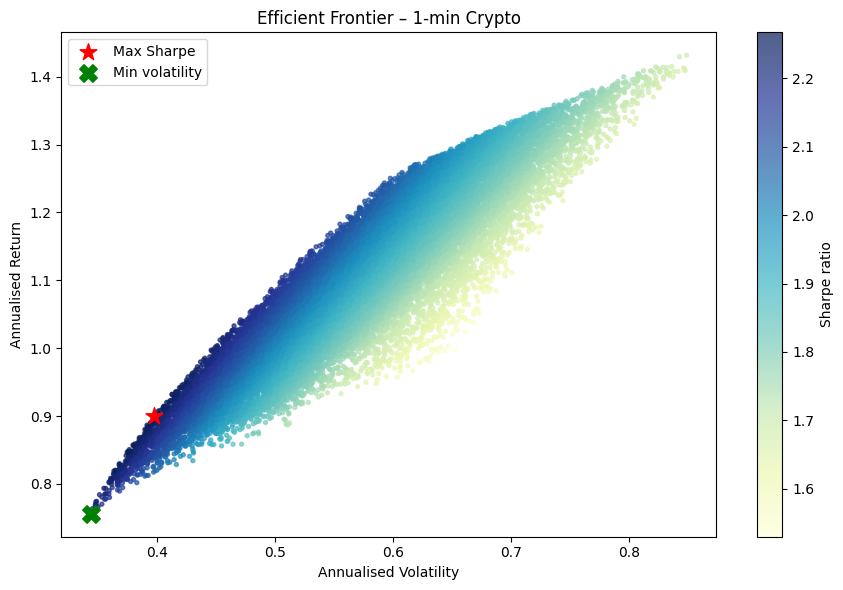

In [5]:
# ‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
# ‚ïë 4) –ì—Ä–∞—Ñ–∏–∫–∞: Efficient Frontier                             ‚ïë
# ‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
fig, ax = plt.subplots(figsize=(9, 6))
sc = ax.scatter(results[0], results[1],
                c=results[2], cmap='YlGnBu', s=8, alpha=0.7)
fig.colorbar(sc, label='Sharpe ratio')

ax.scatter(*results[:2, idx_max_sharpe],
           marker='*', s=160, color='r', label='Max Sharpe')
ax.scatter(*results[:2, idx_min_vol],
           marker='X', s=160, color='g', label='Min volatility')

ax.set(title='Efficient Frontier ‚Äì 1-min Crypto',
       xlabel='Annualised Volatility',
       ylabel='Annualised Return')
ax.legend(); plt.tight_layout()


In [6]:
# ‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
# ‚ïë 5) –ü–æ–∫–∞–∑–≤–∞–Ω–µ –Ω–∞ —Ä–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è—Ç–∞                             ‚ïë
# ‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
alloc_max = pd.Series(weights[idx_max_sharpe], index=tickers).round(2)
alloc_min = pd.Series(weights[idx_min_vol   ], index=tickers).round(2)

print('\n' + '‚îÄ'*70)
print('–ü–û–†–¢–§–ï–ô–õ –° –ú–ê–ö–°. SHARPE')
print(f"  –ì–æ–¥. –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç : {results[1, idx_max_sharpe]:.2%}")
print(f"  –ì–æ–¥. –≤–æ–ª–∞—Ç–∏–ª–Ω–æ—Å—Ç : {results[0, idx_max_sharpe]:.2%}\n")
display(alloc_max.to_frame('Weight').T)

print('\n' + '‚îÄ'*70)
print('–ü–û–†–¢–§–ï–ô–õ –° –ú–ò–ù. –í–û–õ–ê–¢–ò–õ–ù–û–°–¢')
print(f"  –ì–æ–¥. –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç : {results[1, idx_min_vol]:.2%}")
print(f"  –ì–æ–¥. –≤–æ–ª–∞—Ç–∏–ª–Ω–æ—Å—Ç : {results[0, idx_min_vol]:.2%}\n")
display(alloc_min.to_frame('Weight').T)



‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
–ü–û–†–¢–§–ï–ô–õ –° –ú–ê–ö–°. SHARPE
  –ì–æ–¥. –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç : 90.00%
  –ì–æ–¥. –≤–æ–ª–∞—Ç–∏–ª–Ω–æ—Å—Ç : 39.70%



BTC  LINK   TRX   ZRX
Weight  0.5  0.06  0.35  0.09


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
–ü–û–†–¢–§–ï–ô–õ –° –ú–ò–ù. –í–û–õ–ê–¢–ò–õ–ù–û–°–¢
  –ì–æ–¥. –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç : 75.60%
  –ì–æ–¥. –≤–æ–ª–∞—Ç–∏–ª–Ω–æ—Å—Ç : 34.38%



BTC  LINK   TRX  ZRX
Weight  0.48  0.02  0.49  0.0

In [7]:
# ‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
# ‚ïë 6) –ì–µ–Ω–µ—Ç–∏—á–µ–Ω –∞–ª–≥–æ—Ä–∏—Ç—ä–º ‚Äì –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –Ω–∞ Sharpe              ‚ïë
# ‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
import random

# --------------------------------------------------------------
# –•–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –Ω–∞ GA
# --------------------------------------------------------------
POP_SIZE       = 1000          # –∫–æ–ª–∫–æ –∏–Ω–¥–∏–≤–∏–¥–∞ –≤—ä–≤ –≤—Å—è–∫–æ –ø–æ–∫–æ–ª–µ–Ω–∏–µ
NB_GENERATIONS = 50             # –∫–æ–ª–∫–æ –ø–æ–∫–æ–ª–µ–Ω–∏—è
ELITE_FRAC     = 0.10           # –Ω–∞–π-–¥–æ–±—Ä–∏—è—Ç % –∏–Ω–¥–∏–≤–∏–¥–∏, –∫–æ–∏—Ç–æ –∫–æ–ø–∏—Ä–∞–º–µ –¥–∏—Ä–µ–∫—Ç–Ω–æ
MUTATE_FRAC    = 0.15           # —à–∞–Ω—Å –¥–∞–¥–µ–Ω–æ –¥–µ—Ç–µ –¥–∞ –±—ä–¥–µ –º—É—Ç–∞–Ω—Ç
MUTATE_SCALE   = 0.10           # –∫–æ–ª–∫–æ —Å–∏–ª–Ω–æ ‚Äû—Ä–∏—Ç–∞‚Äú –º—É—Ç–∞–Ω—Ç—ä—Ç —Ç–µ–≥–ª–æ—Ç–æ
PLOT_X = 5
PLOT_Y = 5


np.random.seed(123)

# --------------------------------------------------------------
# –§–∏—Ç–Ω–µ—Å —Ñ—É–Ω–∫—Ü–∏—è ‚Äì –≥–æ–¥–∏—à–µ–Ω Sharpe
# --------------------------------------------------------------
def fitness(w: np.ndarray) -> float:
    """
    w —Ç—Ä—è–±–≤–∞ –≤–µ—á–µ –¥–∞ –µ –Ω–æ—Ä–º–∞–ª–∏–∑–∏—Ä–∞–Ω: Œ£ w_i = 1
    """
    mu_bar  = w @ means_bar
    sig_bar = np.sqrt(w @ cov_bar @ w)
    
    mu_ann  = mu_bar  * PERIODS_PER_YEAR
    sig_ann = sig_bar * np.sqrt(PERIODS_PER_YEAR)
    return (mu_ann - RISK_FREE) / sig_ann


# --------------------------------------------------------------
# GA –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∏: –∫—Ä–æ—Å–æ—É–≤—ä—Ä, –º—É—Ç–∞—Ü–∏—è, —Å—ä–∑–¥–∞–≤–∞–Ω–µ –Ω–∞ –ø–æ–∫–æ–ª–µ–Ω–∏–µ
# --------------------------------------------------------------
def crossover(p1: np.ndarray, p2: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    –°–∏–º–ø—ä–ª Œ±-crossover (Œ± ~ U[0,1])
    """
    Œ± = np.random.rand()
    c1 = Œ± * p1 + (1 - Œ±) * p2
    c2 = (1 - Œ±) * p1 + Œ± * p2
    return c1, c2

def mutate(child: np.ndarray) -> np.ndarray:
    """
    –ò–∑–±—É—Ç–≤–∞ —Å–ª—É—á–∞–π–Ω–æ —Ç–µ–≥–ª–æ —Å N(0, MUTATE_SCALE).
    –ü–æ—Å–ª–µ –Ω–æ—Ä–º–∞–ª–∏–∑–∏—Ä–∞ –∏ —Ä–µ–∂–µ –¥–æ WEIGHT_CAP.
    """
    idx = np.random.randint(len(child))
    child[idx] += np.random.normal(0, MUTATE_SCALE)
    child = np.clip(child, 0, WEIGHT_CAP)      # –∑–∞—â–∏—Ç–Ω–æ –∏–∑—Ä—è–∑–≤–∞–Ω–µ
    child /= child.sum()
    return child

def next_generation(pop: list[np.ndarray]) -> list[np.ndarray]:
    """
    –°—ä–∑–¥–∞–≤–∞ —Å–ª–µ–¥–≤–∞—â–æ—Ç–æ –ø–æ–∫–æ–ª–µ–Ω–∏–µ:
      1. —Å–æ—Ä—Ç–∏—Ä–∞ –ø–æ fitness (–Ω–∏–∑—Ö–æ–¥—è—â)
      2. –≤–∑–µ–º–∞ ELITE_FRAC –∫–∞—Ç–æ ‚Äú–µ–ª–∏—Ç‚Äù
      3. –ø—Ä–∞–≤–∏ –¥–µ—Ü–∞ —á—Ä–µ–∑ –∫—Ä–æ—Å–æ—É–≤—ä—Ä
      4. –º—É—Ç–∏—Ä–∞ —á–∞—Å—Ç –æ—Ç –¥–µ—Ü–∞—Ç–∞
      5. –Ω–æ—Ä–º–∞–ª–∏–∑–∏—Ä–∞ —Ç–µ–≥–ª–∞—Ç–∞
    """
    pop = sorted(pop, key=fitness, reverse=True)
    elite_n = int(len(pop) * ELITE_FRAC)
    new_pop = pop[:elite_n]                       # –∑–∞–ø–∞–∑–≤–∞–º–µ –µ–ª–∏—Ç–∞
    
    # ‚Äì‚Äì‚Äì —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–∞–º–µ –µ–ª–∏—Ç–∞, –∑–∞ –¥–∞ –ø—Ä–∞–≤–∏–º —Å–ª—É—á–∞–π–Ω–∏ –¥–≤–æ–π–∫–∏
    random.shuffle(new_pop)
    parents = new_pop.copy()
    
    # ‚Äì‚Äì‚Äì –∫—Ä–æ—Å–æ—É–≤—ä—Ä
    children = []
    for p1, p2 in zip(parents[::2], parents[1::2]):
        c1, c2 = crossover(p1, p2)
        children.extend([c1, c2])
    
    # ‚Äì‚Äì‚Äì –º—É—Ç–∞—Ü–∏–∏
    for k in range(len(children)):
        if np.random.rand() < MUTATE_FRAC:
            children[k] = mutate(children[k])
        # –∑–∞–¥—ä–ª–∂–∏—Ç–µ–ª–Ω–∞ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è + cap
        children[k] = np.clip(children[k], 0, WEIGHT_CAP)
        children[k] /= children[k].sum()
    
    new_pop.extend(children)
    
    # –∞–∫–æ –ø–æ–ø—É–ª–∞—Ü–∏—è—Ç–∞ –µ –Ω–µ–¥–æ—Å—Ç–∞—Ç—ä—á–Ω–∞ (–Ω–µ—á–µ—Ç–µ–Ω –±—Ä–æ–π —Ä–æ–¥–∏—Ç–µ–ª–∏)
    while len(new_pop) < POP_SIZE:
        w = np.random.random(len(tickers))
        w /= w.sum()
        if (w > WEIGHT_CAP).any():
            continue
        new_pop.append(w)
    return new_pop[:POP_SIZE]


# hyperparameters optimizer
import numpy as np, random, math, optuna, time
from copy import deepcopy
def run_ga_once(pop_size, nb_generations, elite_frac,
                mutate_frac, mutate_scale,
                weight_cap, seed=None):
    """
    –°—Ç–∞—Ä—Ç–∏—Ä–∞ –ï–î–ù–û –∏–∑–ø—ä–ª–Ω–µ–Ω–∏–µ –Ω–∞ GA —Å –ø–æ–¥–∞–¥–µ–Ω–∏—Ç–µ —Ö–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏.
    –í—Ä—ä—â–∞ Sharpe –Ω–∞ –Ω–∞–π-–¥–æ–±—Ä–∏—è –∏–Ω–¥–∏–≤–∏–¥.
    """

    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)

    # -------------- –ª–æ–∫–∞–ª–Ω–∏ override-–∏ –Ω–∞ –≥–ª–æ–±–∞–ª–Ω–∏—Ç–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∏ --------------
    global POP_SIZE, NB_GENERATIONS, ELITE_FRAC
    global MUTATE_FRAC, MUTATE_SCALE, WEIGHT_CAP

    POP_SIZE       = pop_size
    NB_GENERATIONS = nb_generations
    ELITE_FRAC     = elite_frac
    MUTATE_FRAC    = mutate_frac
    MUTATE_SCALE   = mutate_scale
    WEIGHT_CAP     = weight_cap          # –Ω–æ–≤ –ø–∞—Ä–∞–º–µ—Ç—ä—Ä!

    # -------------- –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–∞–º–µ –ø—ä—Ä–≤–æ—Ç–æ –ø–æ–∫–æ–ª–µ–Ω–∏–µ ------------------------
    population = []
    while len(population) < POP_SIZE:
        w = np.random.random(len(tickers))
        w /= w.sum()
        if (w > WEIGHT_CAP).any():
            continue
        population.append(w)

    # -------------- –µ–≤–æ–ª—é–∏—Ä–∞–º–µ ----------------------------------------------
    best_fit = -math.inf
    for g in range(NB_GENERATIONS):
        population = next_generation(population)
        # –æ—Ü–µ–Ω—è–≤–∞–º–µ –µ–ª–∏—Ç–∞
        top = max(population, key=fitness)
        best_fit = max(best_fit, fitness(top))

    return best_fit   # ‚Üë Sharpe –Ω–∞ –Ω–∞–π-—Å–∏–ª–Ω–∏—è –∏–Ω–¥–∏–≤–∏–¥

def objective(trial: optuna.trial.Trial) -> float:
    """
    Optuna —â–µ –ø—Ä–æ–±–≤–∞ —Ä–∞–∑–ª–∏—á–Ω–∏ GA-—Ö–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –∏ —â–µ
    –≤—Ä—ä—â–∞ >>—Å—Ä–µ–¥–Ω–∏—è<< Sharpe –æ—Ç K —Ä–µ—Å—Ç–∞—Ä—Ç–∞ –Ω–∞ GA.
    """
    # 1) –¥–µ—Ñ–∏–Ω–∏—Ä–∞–º–µ —Ç—ä—Ä—Å–µ–Ω–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ
    pop_size       = trial.suggest_int   ('pop_size',        200, 1500, step=100)
    nb_generations = trial.suggest_int   ('nb_generations',   20, 200,  step=10)
    elite_frac     = trial.suggest_float ('elite_frac',      0.05, 0.35)
    mutate_frac    = trial.suggest_float ('mutate_frac',     0.05, 0.40)
    mutate_scale   = trial.suggest_float ('mutate_scale',    0.01, 0.50, log=True)
    weight_cap     = trial.suggest_float ('weight_cap',      0.30, 0.70)

    # 2) –∑–∞ —Å—Ç–∞–±–∏–ª–Ω–æ—Å—Ç ‚Äí —Å—Ç–∞—Ä—Ç–∏—Ä–∞–º–µ GA K –ø—ä—Ç–∏ —Å —Ä–∞–∑–ª. seed
    K, scores = 3, []
    for k in range(K):
        seed = 2024 + k
        score = run_ga_once(pop_size, nb_generations,
                            elite_frac, mutate_frac, mutate_scale,
                            weight_cap, seed=seed)
        scores.append(score)

    # 3) Optuna –º–∞–∫—Å–∏–º–∏–∑–∏—Ä–∞ -> –≤—Ä—ä—â–∞–º–µ —Å—Ä–µ–¥–Ω–∞—Ç–∞ —Å—Ç–æ–π–Ω–æ—Å—Ç
    return float(np.mean(scores))

study = optuna.create_study(direction="maximize",
                            sampler=optuna.samplers.TPESampler(),
                            pruner =optuna.pruners.MedianPruner(
                                        n_startup_trials=10, n_warmup_steps=5))
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
study.optimize(objective,
               n_trials = 40,          # –∏–ª–∏ –ø–æ –≤—Ä–µ–º–µ: timeout=3600
               show_progress_bar=True)

print("üèÜ –ù–∞–π-–¥–æ–±—Ä–∏—Ç–µ GA-—Ö–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏:")
for k, v in study.best_trial.params.items():
    print(f"  {k:15s} : {v}")
print("–°—Ä–µ–¥–µ–Ω Sharpe  :", study.best_value)




/home/npenchev/fun/summer-school-2025-crypto-forecasting/.venv/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-06-27 22:01:57,396] A new study created in memory with name: no-name-74614448-712c-4d2a-b09f-de20b36573ab
Best trial: 0. Best value: 2.28895:   2%|‚ñà‚ñà‚ñâ                                                                                                                 | 1/40 [00:14<09:06, 14.02s/it]

[I 2025-06-27 22:02:11,419] Trial 0 finished with value: 2.288952247296682 and parameters: {'pop_size': 1500, 'nb_generations': 110, 'elite_frac': 0.09780352430087787, 'mutate_frac': 0.17816035234705785, 'mutate_scale': 0.03937867380749903, 'weight_cap': 0.5277896841693224}. Best is trial 0 with value: 2.288952247296682.


Best trial: 1. Best value: 2.31039:   5%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                                                                              | 2/40 [00:20<06:02,  9.55s/it]

[I 2025-06-27 22:02:17,844] Trial 1 finished with value: 2.3103879708344652 and parameters: {'pop_size': 1500, 'nb_generations': 50, 'elite_frac': 0.13301065347796637, 'mutate_frac': 0.3434983206652151, 'mutate_scale': 0.3220214351735864, 'weight_cap': 0.6726454723052014}. Best is trial 1 with value: 2.3103879708344652.


Best trial: 1. Best value: 2.31039:   8%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                                                                           | 3/40 [00:29<05:49,  9.45s/it]

[I 2025-06-27 22:02:27,183] Trial 2 finished with value: 2.3076264301881886 and parameters: {'pop_size': 1500, 'nb_generations': 70, 'elite_frac': 0.12786859797997957, 'mutate_frac': 0.2039614390140837, 'mutate_scale': 0.08209707990281764, 'weight_cap': 0.6234181321163419}. Best is trial 1 with value: 2.3103879708344652.


Best trial: 1. Best value: 2.31039:  10%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                                                                        | 4/40 [00:49<08:12, 13.69s/it]

[I 2025-06-27 22:02:47,356] Trial 3 finished with value: 2.1873762200356546 and parameters: {'pop_size': 1000, 'nb_generations': 150, 'elite_frac': 0.1462834173297069, 'mutate_frac': 0.1463886517037108, 'mutate_scale': 0.011054299846926307, 'weight_cap': 0.36021413776418165}. Best is trial 1 with value: 2.3103879708344652.


Best trial: 1. Best value: 2.31039:  12%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                                                                     | 5/40 [00:51<05:29,  9.42s/it]

[I 2025-06-27 22:02:49,214] Trial 4 finished with value: 2.2777780375159176 and parameters: {'pop_size': 400, 'nb_generations': 50, 'elite_frac': 0.3128627198658071, 'mutate_frac': 0.1995175024814031, 'mutate_scale': 0.18892380234308678, 'weight_cap': 0.49038979858400134}. Best is trial 1 with value: 2.3103879708344652.


Best trial: 1. Best value: 2.31039:  15%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                                                                  | 6/40 [01:19<08:55, 15.76s/it]

[I 2025-06-27 22:03:17,273] Trial 5 finished with value: 2.2386762839637595 and parameters: {'pop_size': 1300, 'nb_generations': 200, 'elite_frac': 0.10637410242371949, 'mutate_frac': 0.06390185831565233, 'mutate_scale': 0.025567853100082104, 'weight_cap': 0.3999997830892388}. Best is trial 1 with value: 2.3103879708344652.


Best trial: 1. Best value: 2.31039:  18%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                                                               | 7/40 [01:28<07:18, 13.29s/it]

[I 2025-06-27 22:03:25,492] Trial 6 finished with value: 2.2960047586806334 and parameters: {'pop_size': 600, 'nb_generations': 150, 'elite_frac': 0.19992749482558958, 'mutate_frac': 0.06409963702537722, 'mutate_scale': 0.014017082473853254, 'weight_cap': 0.5702306750459905}. Best is trial 1 with value: 2.3103879708344652.


Best trial: 1. Best value: 2.31039:  20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                                                            | 8/40 [01:33<05:45, 10.79s/it]

[I 2025-06-27 22:03:30,912] Trial 7 finished with value: 2.2951430252413396 and parameters: {'pop_size': 800, 'nb_generations': 80, 'elite_frac': 0.33867640042423125, 'mutate_frac': 0.19348937061636062, 'mutate_scale': 0.26521049227200044, 'weight_cap': 0.536572210475454}. Best is trial 1 with value: 2.3103879708344652.


Best trial: 1. Best value: 2.31039:  22%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                                                          | 9/40 [01:36<04:20,  8.41s/it]

[I 2025-06-27 22:03:34,096] Trial 8 finished with value: 2.1794172644142424 and parameters: {'pop_size': 300, 'nb_generations': 40, 'elite_frac': 0.05480072437666166, 'mutate_frac': 0.16088966271544186, 'mutate_scale': 0.07119684571905537, 'weight_cap': 0.32309500846398936}. Best is trial 1 with value: 2.3103879708344652.


Best trial: 1. Best value: 2.31039:  25%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                                                      | 10/40 [01:58<06:16, 12.55s/it]

[I 2025-06-27 22:03:55,905] Trial 9 finished with value: 2.245307247414314 and parameters: {'pop_size': 1500, 'nb_generations': 130, 'elite_frac': 0.3153182848180099, 'mutate_frac': 0.3980657782088751, 'mutate_scale': 0.06465525711752844, 'weight_cap': 0.38975081561901037}. Best is trial 1 with value: 2.3103879708344652.


Best trial: 10. Best value: 2.31053:  28%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                                                  | 11/40 [02:00<04:30,  9.34s/it]

[I 2025-06-27 22:03:57,964] Trial 10 finished with value: 2.310530017566233 and parameters: {'pop_size': 1100, 'nb_generations': 20, 'elite_frac': 0.24975522808447415, 'mutate_frac': 0.3535727493187389, 'mutate_scale': 0.4656148097915095, 'weight_cap': 0.6940566167832998}. Best is trial 10 with value: 2.310530017566233.


Best trial: 11. Best value: 2.31055:  30%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                                               | 12/40 [02:02<03:18,  7.07s/it]

[I 2025-06-27 22:03:59,861] Trial 11 finished with value: 2.310546341062104 and parameters: {'pop_size': 1100, 'nb_generations': 20, 'elite_frac': 0.24899964407506903, 'mutate_frac': 0.3568247260039509, 'mutate_scale': 0.47910550949225034, 'weight_cap': 0.6994270278458621}. Best is trial 11 with value: 2.310546341062104.


Best trial: 12. Best value: 2.31063:  32%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                                             | 13/40 [02:04<02:31,  5.60s/it]

[I 2025-06-27 22:04:02,061] Trial 12 finished with value: 2.310632987520226 and parameters: {'pop_size': 1100, 'nb_generations': 20, 'elite_frac': 0.2522496975608299, 'mutate_frac': 0.2935234035949816, 'mutate_scale': 0.48447084224442594, 'weight_cap': 0.6908468010465865}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  35%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                                          | 14/40 [02:06<01:58,  4.56s/it]

[I 2025-06-27 22:04:04,237] Trial 13 finished with value: 2.3077155368802273 and parameters: {'pop_size': 1100, 'nb_generations': 20, 'elite_frac': 0.250735982645579, 'mutate_frac': 0.27293657689946227, 'mutate_scale': 0.14624103095815547, 'weight_cap': 0.6267700035675537}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  38%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                                       | 15/40 [02:13<02:12,  5.28s/it]

[I 2025-06-27 22:04:11,194] Trial 14 finished with value: 2.307109175427481 and parameters: {'pop_size': 800, 'nb_generations': 90, 'elite_frac': 0.22987665570625404, 'mutate_frac': 0.2727925980352911, 'mutate_scale': 0.48690309567472284, 'weight_cap': 0.6226726441444784}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  40%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                                    | 16/40 [02:16<01:44,  4.37s/it]

[I 2025-06-27 22:04:13,435] Trial 15 finished with value: 2.3104731557429568 and parameters: {'pop_size': 1200, 'nb_generations': 20, 'elite_frac': 0.19383061242202557, 'mutate_frac': 0.28416891137615063, 'mutate_scale': 0.1354954654448241, 'weight_cap': 0.6994603654646013}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  42%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                                 | 17/40 [02:21<01:49,  4.74s/it]

[I 2025-06-27 22:04:19,038] Trial 16 finished with value: 2.2666191982145416 and parameters: {'pop_size': 900, 'nb_generations': 60, 'elite_frac': 0.2819417709756082, 'mutate_frac': 0.3141448020328794, 'mutate_scale': 0.2858896147384021, 'weight_cap': 0.4432174628633698}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  45%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                              | 18/40 [02:32<02:26,  6.65s/it]

[I 2025-06-27 22:04:30,126] Trial 17 finished with value: 2.304491148599876 and parameters: {'pop_size': 600, 'nb_generations': 190, 'elite_frac': 0.17223260214446867, 'mutate_frac': 0.39648594574998886, 'mutate_scale': 0.2145429304144265, 'weight_cap': 0.5839706322492191}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  48%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                           | 19/40 [02:45<03:01,  8.62s/it]

[I 2025-06-27 22:04:43,349] Trial 18 finished with value: 2.3102091333280135 and parameters: {'pop_size': 1300, 'nb_generations': 100, 'elite_frac': 0.27755265291815906, 'mutate_frac': 0.23582471150746315, 'mutate_scale': 0.4977594753139049, 'weight_cap': 0.6610001913574544}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                         | 20/40 [02:48<02:15,  6.78s/it]

[I 2025-06-27 22:04:45,818] Trial 19 finished with value: 2.308989048882372 and parameters: {'pop_size': 600, 'nb_generations': 40, 'elite_frac': 0.21927969713338388, 'mutate_frac': 0.3280616636430216, 'mutate_scale': 0.13201098290098157, 'weight_cap': 0.6395038247512874}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                      | 21/40 [02:52<01:52,  5.92s/it]

[I 2025-06-27 22:04:49,734] Trial 20 finished with value: 2.307907689636403 and parameters: {'pop_size': 1300, 'nb_generations': 30, 'elite_frac': 0.27834909982212536, 'mutate_frac': 0.3608992868359018, 'mutate_scale': 0.33470883016589736, 'weight_cap': 0.5874518960065551}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                   | 22/40 [02:54<01:26,  4.83s/it]

[I 2025-06-27 22:04:52,039] Trial 21 finished with value: 2.3104614144207916 and parameters: {'pop_size': 1100, 'nb_generations': 20, 'elite_frac': 0.2454076110504692, 'mutate_frac': 0.36520753784763876, 'mutate_scale': 0.4056029623257563, 'weight_cap': 0.6875589264650181}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                | 23/40 [03:00<01:26,  5.07s/it]

[I 2025-06-27 22:04:57,652] Trial 22 finished with value: 2.310163130694298 and parameters: {'pop_size': 900, 'nb_generations': 60, 'elite_frac': 0.2565059408190628, 'mutate_frac': 0.3023987158193799, 'mutate_scale': 0.22208319797421144, 'weight_cap': 0.6587918567119804}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                             | 24/40 [03:05<01:20,  5.03s/it]

[I 2025-06-27 22:05:02,596] Trial 23 finished with value: 2.310484472068914 and parameters: {'pop_size': 1100, 'nb_generations': 40, 'elite_frac': 0.3020912155299515, 'mutate_frac': 0.24420043971966224, 'mutate_scale': 0.36897423467963525, 'weight_cap': 0.6908371127425668}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                          | 25/40 [03:07<01:03,  4.25s/it]

[I 2025-06-27 22:05:05,023] Trial 24 finished with value: 2.309034515091049 and parameters: {'pop_size': 1000, 'nb_generations': 20, 'elite_frac': 0.21937765938385173, 'mutate_frac': 0.3602075926742163, 'mutate_scale': 0.49399028236235193, 'weight_cap': 0.6120693852452954}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                        | 26/40 [03:15<01:15,  5.42s/it]

[I 2025-06-27 22:05:13,148] Trial 25 finished with value: 2.309707334745594 and parameters: {'pop_size': 1200, 'nb_generations': 70, 'elite_frac': 0.17754835586454185, 'mutate_frac': 0.3278170182422888, 'mutate_scale': 0.09804392094274104, 'weight_cap': 0.6528006570545801}. Best is trial 12 with value: 2.310632987520226.


Best trial: 12. Best value: 2.31063:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                     | 27/40 [03:19<01:04,  4.97s/it]

[I 2025-06-27 22:05:17,080] Trial 26 finished with value: 2.276595143608113 and parameters: {'pop_size': 1000, 'nb_generations': 30, 'elite_frac': 0.26343107171935537, 'mutate_frac': 0.2961369730223795, 'mutate_scale': 0.17998122623155402, 'weight_cap': 0.4712731580299576}. Best is trial 12 with value: 2.310632987520226.


Best trial: 27. Best value: 2.31063:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                  | 28/40 [03:23<00:56,  4.67s/it]

[I 2025-06-27 22:05:21,059] Trial 27 finished with value: 2.3106333897420552 and parameters: {'pop_size': 700, 'nb_generations': 50, 'elite_frac': 0.34249724978684576, 'mutate_frac': 0.3793673787601312, 'mutate_scale': 0.2539800937602555, 'weight_cap': 0.6994412725517846}. Best is trial 27 with value: 2.3106333897420552.


Best trial: 27. Best value: 2.31063:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                               | 29/40 [03:27<00:49,  4.51s/it]

[I 2025-06-27 22:05:25,186] Trial 28 finished with value: 2.301056577267429 and parameters: {'pop_size': 700, 'nb_generations': 50, 'elite_frac': 0.34456649395792244, 'mutate_frac': 0.3793160255999237, 'mutate_scale': 0.26271017134810265, 'weight_cap': 0.5501220121698677}. Best is trial 27 with value: 2.3106333897420552.


Best trial: 27. Best value: 2.31063:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                            | 30/40 [03:32<00:46,  4.70s/it]

[I 2025-06-27 22:05:30,327] Trial 29 finished with value: 2.3053401714618555 and parameters: {'pop_size': 500, 'nb_generations': 100, 'elite_frac': 0.3295392107568563, 'mutate_frac': 0.25678312915327295, 'mutate_scale': 0.050046732048174856, 'weight_cap': 0.5935533928596746}. Best is trial 27 with value: 2.3106333897420552.


Best trial: 27. Best value: 2.31063:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                         | 31/40 [03:40<00:50,  5.57s/it]

[I 2025-06-27 22:05:37,924] Trial 30 finished with value: 2.309148497533591 and parameters: {'pop_size': 700, 'nb_generations': 120, 'elite_frac': 0.2920490568037399, 'mutate_frac': 0.32462448050340525, 'mutate_scale': 0.02178295330028513, 'weight_cap': 0.650229665685999}. Best is trial 27 with value: 2.3106333897420552.


Best trial: 27. Best value: 2.31063:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                      | 32/40 [03:44<00:39,  4.97s/it]

[I 2025-06-27 22:05:41,511] Trial 31 finished with value: 2.310539977373795 and parameters: {'pop_size': 1200, 'nb_generations': 30, 'elite_frac': 0.22883167036788762, 'mutate_frac': 0.3479478276306221, 'mutate_scale': 0.39191668393185936, 'weight_cap': 0.6969977197504273}. Best is trial 27 with value: 2.3106333897420552.


Best trial: 27. Best value: 2.31063:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                    | 33/40 [03:49<00:34,  4.95s/it]

[I 2025-06-27 22:05:46,403] Trial 32 finished with value: 2.310285134884032 and parameters: {'pop_size': 1200, 'nb_generations': 40, 'elite_frac': 0.2257053712364474, 'mutate_frac': 0.3782107954007785, 'mutate_scale': 0.3633753537545189, 'weight_cap': 0.6749295090626447}. Best is trial 27 with value: 2.3106333897420552.


Best trial: 27. Best value: 2.31063:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                 | 34/40 [03:56<00:34,  5.72s/it]

[I 2025-06-27 22:05:53,920] Trial 33 finished with value: 2.3101147144233916 and parameters: {'pop_size': 1400, 'nb_generations': 60, 'elite_frac': 0.1639646095896915, 'mutate_frac': 0.3410540755383855, 'mutate_scale': 0.2879314124586275, 'weight_cap': 0.6655663846417375}. Best is trial 27 with value: 2.3106333897420552.


Best trial: 27. Best value: 2.31063:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä              | 35/40 [04:00<00:26,  5.24s/it]

[I 2025-06-27 22:05:58,037] Trial 34 finished with value: 2.310516575182992 and parameters: {'pop_size': 1400, 'nb_generations': 30, 'elite_frac': 0.20641735262300126, 'mutate_frac': 0.34486033592948434, 'mutate_scale': 0.37308383859561955, 'weight_cap': 0.6979853814615772}. Best is trial 27 with value: 2.3106333897420552.


Best trial: 27. Best value: 2.31063:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå           | 36/40 [04:01<00:16,  4.00s/it]

[I 2025-06-27 22:05:59,152] Trial 35 finished with value: 2.3062731159510848 and parameters: {'pop_size': 200, 'nb_generations': 50, 'elite_frac': 0.23289034508922904, 'mutate_frac': 0.3798492492379119, 'mutate_scale': 0.24703843070539075, 'weight_cap': 0.6090234558769217}. Best is trial 27 with value: 2.3106333897420552.


Best trial: 27. Best value: 2.31063:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç        | 37/40 [04:08<00:14,  4.77s/it]

[I 2025-06-27 22:06:05,707] Trial 36 finished with value: 2.3102767490885614 and parameters: {'pop_size': 900, 'nb_generations': 70, 'elite_frac': 0.3180827727777953, 'mutate_frac': 0.3057699487133961, 'mutate_scale': 0.17879938608050783, 'weight_cap': 0.6717630694840392}. Best is trial 27 with value: 2.3106333897420552.


Best trial: 27. Best value: 2.31063:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé     | 38/40 [04:10<00:08,  4.14s/it]

[I 2025-06-27 22:06:08,397] Trial 37 finished with value: 2.307451239245658 and parameters: {'pop_size': 1000, 'nb_generations': 30, 'elite_frac': 0.14382784111687058, 'mutate_frac': 0.09569303938322396, 'mutate_scale': 0.10327969608716027, 'weight_cap': 0.6362985034310269}. Best is trial 27 with value: 2.3106333897420552.


Best trial: 27. Best value: 2.31063:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 39/40 [04:18<00:05,  5.16s/it]

[I 2025-06-27 22:06:15,937] Trial 38 finished with value: 2.2861878042838133 and parameters: {'pop_size': 800, 'nb_generations': 80, 'elite_frac': 0.11013402537734131, 'mutate_frac': 0.340682443779759, 'mutate_scale': 0.3058195523359456, 'weight_cap': 0.5065290559356527}. Best is trial 27 with value: 2.3106333897420552.


Best trial: 27. Best value: 2.31063: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [04:40<00:00,  7.02s/it]

[I 2025-06-27 22:06:38,290] Trial 39 finished with value: 2.3018696531472327 and parameters: {'pop_size': 1400, 'nb_generations': 160, 'elite_frac': 0.27174902517397087, 'mutate_frac': 0.20937143350545745, 'mutate_scale': 0.40353182478727473, 'weight_cap': 0.5589278921397054}. Best is trial 27 with value: 2.3106333897420552.
üèÜ –ù–∞–π-–¥–æ–±—Ä–∏—Ç–µ GA-—Ö–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏:
  pop_size        : 700
  nb_generations  : 50
  elite_frac      : 0.34249724978684576
  mutate_frac     : 0.3793673787601312
  mutate_scale    : 0.2539800937602555
  weight_cap      : 0.6994412725517846
–°—Ä–µ–¥–µ–Ω Sharpe  : 2.3106333897420552


In [8]:
    # POP_SIZE       = pop_size
    # NB_GENERATIONS = nb_generations
    # ELITE_FRAC     = elite_frac
    # MUTATE_FRAC    = mutate_frac
    # MUTATE_SCALE   = mutate_scale
    # WEIGHT_CAP     = weight_cap 
print("OPTIMIZED HYPERPARAMETERS")
print(f"POP_SIZE: {POP_SIZE}")
print(f"NB_GENERATIONS: {NB_GENERATIONS}")
print(f"ELITE_FRAC: {ELITE_FRAC}")
print(f"MUTATE_FRAC: {MUTATE_FRAC}")
print(f"MUTATE_SCALE: {MUTATE_SCALE}")
print(f"WEIGHT_CAP: {WEIGHT_CAP}")

OPTIMIZED HYPERPARAMETERS
POP_SIZE: 1400
NB_GENERATIONS: 160
ELITE_FRAC: 0.27174902517397087
MUTATE_FRAC: 0.20937143350545745
MUTATE_SCALE: 0.40353182478727473
WEIGHT_CAP: 0.5589278921397054


–©–µ —Å–µ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–∞—Ç –ø–æ–∫–æ–ª–µ–Ω–∏—è: [0, 6, 13, 19, 26, 33, 39, 46, 53, 59, 66, 72, 79, 86, 92, 99, 106, 112, 119, 125, 132, 139, 145, 152, 159]


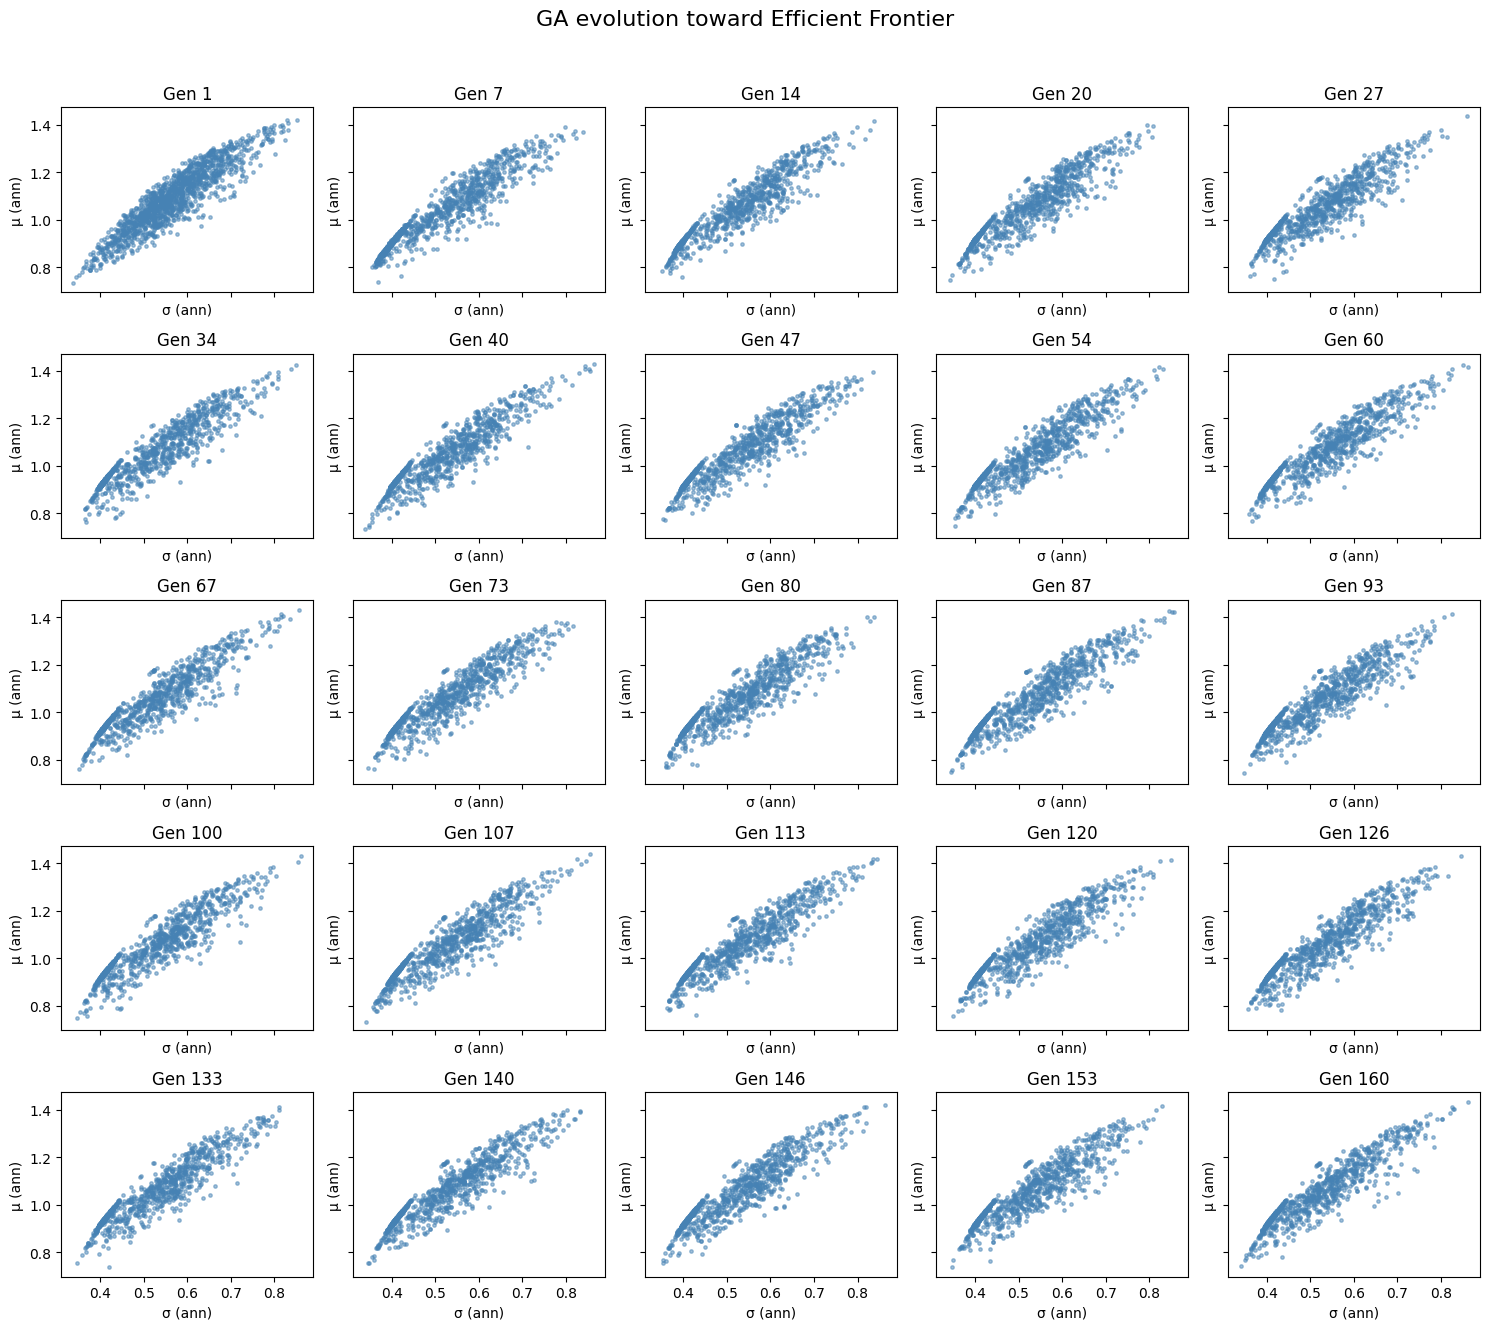

In [9]:
# --------------------------------------------------------------
# 6.1) –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –Ω–∞ –ø—ä—Ä–≤–æ—Ç–æ –ø–æ–∫–æ–ª–µ–Ω–∏–µ
# --------------------------------------------------------------
population = []
while len(population) < POP_SIZE:
    w = np.random.random(len(tickers))
    w /= w.sum()
    if (w > WEIGHT_CAP).any():
        continue
    population.append(w)

# --------------------------------------------------------------
# 6.2) –ï–≤–æ–ª—é—Ü–∏—è –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
# --------------------------------------------------------------
# fig, axs = plt.subplots(PLOT_X, PLOT_Y, figsize=(15, 13), sharex=True, sharey=True)
# axs = axs.flatten()

fig, axs = plt.subplots(PLOT_Y, PLOT_X, figsize=(15, 13),
                        sharex=True, sharey=True)
axs = axs.flatten()
MAX_PLOTS = PLOT_X * PLOT_Y      # 25

# –∫–æ–∏ –ø–æ–∫–æ–ª–µ–Ω–∏—è —â–µ —Ä–∏—Å—É–≤–∞–º–µ
if NB_GENERATIONS <= MAX_PLOTS:
    gens_to_plot = list(range(NB_GENERATIONS))
else:
    # —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–∏ –∏–Ω–¥–µ–∫—Å–∏, –≤–∏–Ω–∞–≥–∏ –≤–∫–ª—é—á–≤–∞ 0
    gens_to_plot = (np.linspace(0, NB_GENERATIONS - 1,
                                num=MAX_PLOTS, dtype=int)
                      .tolist())

print("–©–µ —Å–µ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–∞—Ç –ø–æ–∫–æ–ª–µ–Ω–∏—è:", gens_to_plot)

for g in range(NB_GENERATIONS):
    # ‚îÄ‚îÄ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∑–∞ —Ç–µ–∫—É—â–æ—Ç–æ –ø–æ–∫–æ–ª–µ–Ω–∏–µ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    res = np.zeros((2, POP_SIZE))            # œÉ, Œº  (–≥–æ–¥–∏—à–Ω–∏)
    for i, w in enumerate(population):
        mu_bar  = w @ means_bar
        sig_bar = np.sqrt(w @ cov_bar @ w)
        res[1, i] = mu_bar  * PERIODS_PER_YEAR
        res[0, i] = sig_bar * np.sqrt(PERIODS_PER_YEAR)

    # ‚îÄ‚îÄ —á–µ—Ä—Ç–∞–µ–º —Å–∞–º–æ –∞–∫–æ g e –≤ —Å–ø–∏—Å—ä–∫–∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    if g in gens_to_plot:
        plot_idx = gens_to_plot.index(g)     # 0 ‚Ä¶ 24
        ax = axs[plot_idx]
        ax.scatter(res[0], res[1], s=6, alpha=0.5, c='steelblue')
        ax.set_title(f'Gen {g+1}')
        ax.set_xlabel('œÉ (ann)')
        ax.set_ylabel('Œº (ann)')

    # ‚îÄ‚îÄ –µ–≤–æ–ª—é–∏—Ä–∞–º–µ –∫—ä–º —Å–ª–µ–¥–≤–∞—â–æ –ø–æ–∫–æ–ª–µ–Ω–∏–µ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    population = next_generation(population)

plt.suptitle('GA evolution toward Efficient Frontier', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [11]:
TOP_N = 20        # how many best portfolios you want to list

def ann_stats(w: np.ndarray) -> tuple[float, float, float]:
    mu_bar  = w @ means_bar
    sig_bar = np.sqrt(w @ cov_bar @ w)
    mu_ann  = mu_bar  * PERIODS_PER_YEAR
    sig_ann = sig_bar * np.sqrt(PERIODS_PER_YEAR)
    sharpe  = (mu_ann - RISK_FREE) / sig_ann
    return mu_ann, sig_ann, sharpe

# 1) take the best TOP_N by Sharpe
best_pop = sorted(population, key=fitness, reverse=True)[:TOP_N]

# 2) build one combined table
records = []
for rank, w in enumerate(best_pop, 1):
    mu, sig, shp = ann_stats(w)
    rec = {
        'Rank'      : rank,
        'Annual Œº'  : round(mu, 4),
        'Annual œÉ'  : round(sig, 4),
        'Sharpe'    : round(shp, 3)
    }
    # add the weights, rounded to 3 dp
    rec.update({tkr: round(w[i], 3) for i, tkr in enumerate(tickers)})
    records.append(rec)

top_df = (pd.DataFrame(records)
            .set_index('Rank')
            .sort_index())

display(top_df)


Annual Œº  Annual œÉ  Sharpe    BTC   LINK    TRX    ZRX
Rank                                                        
1       0.9727    0.4224   2.303  0.637  0.067  0.229  0.067
2       1.0165    0.4421   2.299  0.663  0.069  0.179  0.090
3       0.9752    0.4244   2.298  0.618  0.064  0.235  0.083
4       0.9962    0.4335   2.298  0.654  0.039  0.206  0.101
5       0.9722    0.4231   2.298  0.614  0.072  0.238  0.076
6       0.9381    0.4083   2.298  0.614  0.021  0.277  0.088
7       0.9508    0.4139   2.297  0.600  0.057  0.266  0.078
8       0.9615    0.4185   2.297  0.606  0.061  0.253  0.080
9       0.9578    0.4169   2.297  0.605  0.053  0.258  0.084
10      0.9525    0.4146   2.297  0.604  0.046  0.264  0.085
11      0.9611    0.4184   2.297  0.609  0.050  0.254  0.087
12      0.9643    0.4198   2.297  0.606  0.073  0.248  0.073
13      0.9643    0.4198   2.297  0.606  0.073  0.248  0.073
14      0.9555    0.4160   2.297  0.600  0.067  0.259  0.073
15      0.9564    0.4164   2.297  0.600  0.067  0.259  0.074
16      0.9632    0.4194   2.297  0.605  0.072  0.250  0.074
17      0.9608    0.4183   2.297  0.604  0.072  0.253  0.072
18      0.9583    0.4172   2.297  0.602  0.069  0.256  0.073
19      0.9637    0.4196   2.297  0.605  0.073  0.249  0.073
20      0.9736    0.4239   2.297  0.618  0.051  0.239  0.092

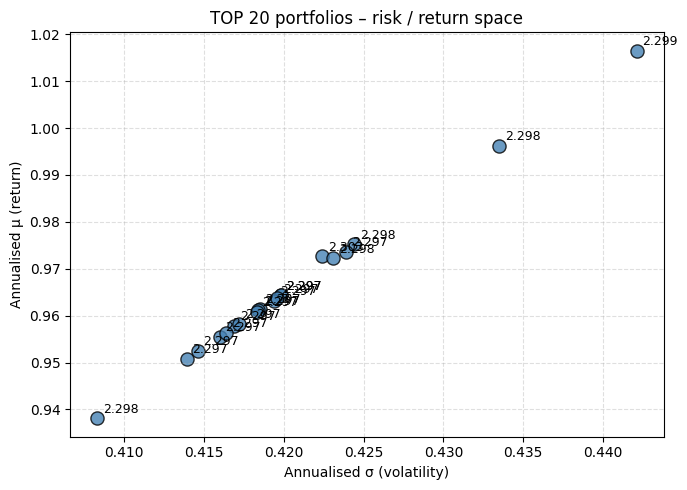

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(top_df['Annual œÉ'], top_df['Annual Œº'],
            s=90, color='steelblue', edgecolors='k', alpha=0.8)

# (–ø–æ –∂–µ–ª–∞–Ω–∏–µ) –µ—Ç–∏–∫–µ—Ç –∫—ä–º –≤—Å—è–∫–∞ —Ç–æ—á–∫–∞ ‚Äì –Ω–æ–º–µ—Ä—ä—Ç –≤ –∫–ª–∞—Å–∞—Ü–∏—è—Ç–∞
for rank, row in top_df.iterrows():
    plt.annotate(str(row['Sharpe']),
                 (row['Annual œÉ'], row['Annual Œº']),
                 textcoords="offset points",
                 xytext=(4, 4), ha='left', fontsize=9)

plt.xlabel('Annualised œÉ (volatility)')
plt.ylabel('Annualised Œº (return)')
plt.title(f'TOP {len(top_df)} portfolios ‚Äì risk / return space')
plt.grid(True, ls='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [13]:
best_w = top_df.iloc[0][tickers].to_dict()
best_w

# –ü–û–†–¢–§–ï–ô–õ –° –ú–ê–ö–°. SHARPE
#   –ì–æ–¥. –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç : 98.79%
#   –ì–æ–¥. –≤–æ–ª–∞—Ç–∏–ª–Ω–æ—Å—Ç : 60.37%

# BTC	ADA	ALGO	ANKR
# Weight	0.5	0.11	0.09	0.3

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –ü–û–†–¢–§–ï–ô–õ –° –ú–ò–ù. –í–û–õ–ê–¢–ò–õ–ù–û–°–¢
#   –ì–æ–¥. –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç : 90.08%
#   –ì–æ–¥. –≤–æ–ª–∞—Ç–∏–ª–Ω–æ—Å—Ç : 57.66%

# BTC	ADA	ALGO	ANKR
# Weight	0.5	0.31	0.12	0.07

{'BTC': 0.637, 'LINK': 0.067, 'TRX': 0.229, 'ZRX': 0.067}

In [14]:
# -*- coding: utf-8 -*-
"""
Backtrader static-weight portfolio back-test
"""
import matplotlib
matplotlib.use('Agg')  
import backtrader as bt
import pandas as pd
from pathlib import Path


# ---------- –ü–∞—Ä–∞–º–µ—Ç—Ä–∏ ------------------------------------------------------

WEIGHTS = best_w

DATA_DIR       = Path('../resources/data/raw')   # –∫–æ—Ä–∏–≥–∏—Ä–∞–π –ø—ä—Ç—è, –∞–∫–æ –µ –Ω—É–∂–Ω–æ
STARTING_CASH  = 100_000
COMMISSION     = 0.001        # 0.1 %
REBALANCE_DAYS = 30         # –Ω–∞–ø—Ä. 30 –∑–∞ –º–µ—Å–µ—á–µ–Ω —Ä–µ–±–∞–ª–∞–Ω—Å


# ---------- –°—Ç—Ä–∞—Ç–µ–≥–∏—è ------------------------------------------------------

class StaticWeightStrategy(bt.Strategy):
    """
    –ü–æ–¥–¥—ä—Ä–∂–∞ —Ñ–∏–∫—Å–∏—Ä–∞–Ω–∏ —Ç–µ–≥–ª–∞. –†–µ–±–∞–ª–∞–Ω—Å–∏—Ä–∞:
      ‚Ä¢ –≤–µ–¥–Ω—ä–∂ –Ω–∞ –ø—ä—Ä–≤–∞—Ç–∞ —Å–≤–µ—â;
      ‚Ä¢ –ø—Ä–µ–∑ `rebalance_days`, –∞–∫–æ –µ –∑–∞–¥–∞–¥–µ–Ω–æ.
    """
    params = (
        ('weights',         None),
        ('rebalance_days',  None),
    )

    def __init__(self):
        self.rebalanced_init = False     # —â–µ —Ä–µ–±–∞–ª–∞–Ω—Å–∏—Ä–∞–º–µ –ø—Ä–∏ –ø—ä—Ä–≤–∞—Ç–∞ —Å–≤–µ—â
        self.last_rebalance  = None      # –∫–∞–ª–µ–Ω–¥–∞—Ä–Ω–æ —Å–ª–µ–¥–µ–Ω–µ (–∞–∫–æ –µ –Ω—É–∂–Ω–æ)

    # --------------------------------------------------
    def next(self):
        dt = self.datas[0].datetime.date(0)   # —Ç–µ–∫—É—â–∞ –¥–∞—Ç–∞

        # --- –ø—ä—Ä–≤–æ–Ω–∞—á–∞–ª–µ–Ω —Ä–µ–±–∞–ª–∞–Ω—Å ---------------------------------
        if not self.rebalanced_init:
            self.rebalance()
            self.rebalanced_init = True
            self.last_rebalance  = dt
            return                          # –∏–∑–ª–∏–∑–∞–º–µ, –∑–∞ –¥–∞ –Ω–µ —É–¥–≤–æ–∏–º —Ä–µ–±–∞–ª–∞–Ω—Å–∞

        # --- –ø–µ—Ä–∏–æ–¥–∏—á–µ–Ω —Ä–µ–±–∞–ª–∞–Ω—Å -----------------------------------
        if self.p.rebalance_days:
            if (dt - self.last_rebalance).days >= self.p.rebalance_days:
                self.rebalance()
                self.last_rebalance = dt

    # --------------------------------------------------
    def rebalance(self):
        """
        –ò–∑—Ä–∞–≤–Ω—è–≤–∞–Ω–µ –Ω–∞ –ø–æ–∑–∏—Ü–∏–∏—Ç–µ –∫—ä–º –∑–∞–¥–∞–¥–µ–Ω–∏—Ç–µ —Ç–µ–≥–ª–∞.
        """
        port_value = self.broker.getvalue()
        for data in self.datas:
            w = self.p.weights.get(data._name, 0.0)
            self.order_target_percent(data=data, target=w)

    # --------------------------------------------------
    def log(self, txt, dt=None):
        pass  # –º–∞—Ö–Ω–∏ 'pass' –∏ —Å–ª–æ–∂–∏ print, –∞–∫–æ –∏—Å–∫–∞—à –ª–æ–≥


# ---------- –ß–µ—Ç–µ–Ω–µ –Ω–∞ CSV ‚Üí DataFeed --------------------------------------

def load_feed(path: str | Path, name: str) -> bt.feeds.PandasData:
    """
    –ß–µ—Ç–µ 1-minute Binance CSV ‚Üí —Ä–µ—Å–µ–º–ø–ª–∏—Ä–∞ –∫—ä–º –¥–Ω–µ–≤–Ω–∏ —Å–≤–µ—â–∏.
    """
    df = (
        pd.read_csv(path, parse_dates=['timestamp'], index_col='timestamp')
          .sort_index()
          .resample('1D')
          .agg({'open':'first', 'high':'max', 'low':'min',
                'close':'last', 'volume':'sum'})
          .dropna()
    )

    print(f'{name}: {len(df):>4} –¥–Ω–∏ | {df.index.min().date()} ‚Üí {df.index.max().date()}')

    return bt.feeds.PandasData(
        dataname=df,
        name=name,
        timeframe=bt.TimeFrame.Days,
        compression=1
    )


# ---------- Cerebro pipeline ----------------------------------------------

cerebro = bt.Cerebro()

# 1) —Å—Ç—Ä–∞—Ç–µ–≥–∏—è
cerebro.addstrategy(
    StaticWeightStrategy,
    weights=WEIGHTS,
    rebalance_days=REBALANCE_DAYS
)

# 2) –±—Ä–æ–∫–µ—Ä
cerebro.broker.setcash(STARTING_CASH)
cerebro.broker.setcommission(commission=COMMISSION)
#  ‚ûú  BUY/SELL —Å—Ç—Ä–µ–ª–∫–∏
cerebro.addobserver(bt.observers.BuySell)     # üìà –ø–æ–∫–∞–∑–≤–∞ –º—è—Å—Ç–æ—Ç–æ –Ω–∞ –≤—Å–µ–∫–∏ –æ—Ä–¥–µ—Ä
cerebro.addobserver(bt.observers.Trades)      # üí¨ –±–∞–ª–æ–Ω–∏ —Å —Ä–µ–∑—É–ª—Ç–∞—Ç–∞ –æ—Ç —Å–¥–µ–ª–∫–∞—Ç–∞

# 3) –¥–∞–Ω–Ω–∏
cerebro.adddata(load_feed(DATA_DIR / 'BTC_USDT_1m.csv',  'BTC'))
cerebro.adddata(load_feed(DATA_DIR / 'LINK_USDT_1m.csv',  'LINK'))
cerebro.adddata(load_feed(DATA_DIR / 'TRX_USDT_1m.csv',   'TRX'))
cerebro.adddata(load_feed(DATA_DIR / 'ZRX_USDT_1m.csv',   'ZRX'))

# ---------- –ë–µ–∫—Ç–µ—Å—Ç --------------------------------------------------------

print(f'\nüü°  Starting Portfolio Value: {cerebro.broker.getvalue():,.2f}')
cerebro.run()
print(f'üü¢  Final Portfolio Value:    {cerebro.broker.getvalue():,.2f}')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 20)
figs = cerebro.plot(iplot=True,                 # True = –∏–∑–∫–∞—Ä–≤–∞ –¥–∏—Ä–µ–∫—Ç–Ω–æ –≤ cell-–∞
             style='candlestick',
             volume=False,
             barup='lime', bardown='red')
fig = figs[0][0]                              # –ø—ä—Ä–≤–∏—è—Ç (–∏ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω) –ø—Ä–æ–∑–æ—Ä–µ—Ü
fig.savefig('BTC_LINK_TRX_ZRX_assets_backtest_chart.png', dpi=300)    # => ./backtest_chart.png
print('–ì—Ä–∞—Ñ–∏–∫–∞—Ç–∞ –µ –∑–∞–ø–∏—Å–∞–Ω–∞ –≤ backtest_chart.png')
# cerebro.plot(style='candlestick')   # –º–∞—Ö–Ω–∏ –∫–æ–º–µ–Ω—Ç–∞—Ä–∞ –∑–∞ –≥—Ä–∞—Ñ–∏–∫–∞


BTC:  366 –¥–Ω–∏ | 2023-06-09 ‚Üí 2024-06-08
LINK:  366 –¥–Ω–∏ | 2023-06-09 ‚Üí 2024-06-08
TRX:  366 –¥–Ω–∏ | 2023-06-09 ‚Üí 2024-06-08
ZRX:  366 –¥–Ω–∏ | 2023-06-09 ‚Üí 2024-06-08

üü°  Starting Portfolio Value: 100,000.00
üü¢  Final Portfolio Value:    219,423.78


<IPython.core.display.Javascript object>

–ì—Ä–∞—Ñ–∏–∫–∞—Ç–∞ –µ –∑–∞–ø–∏—Å–∞–Ω–∞ –≤ backtest_chart.png
